# Instituto Federal de Minas Gerais - Campus Ouro Preto


## Pós Graduação em Inteligência Artificial


Disciplina - Programação Génetica


Prof. Carlos Alexandre


Alunos: Arthur Cardoso Figueiredo e Pâmela Murta Castro Lima


Título: Classificação de Vinhos Utilizando Programação Genética com Dados Balanceados

A classificação de vinhos com base em suas características é um problema comumente abordado no campo da análise de dados. Através da utilização de algoritmos de aprendizado de máquina, é possível criar modelos capazes de prever a qualidade do vinho com base em suas propriedades químicas e sensoriais. No entanto, um desafio encontrado nessa tarefa é lidar com conjuntos de dados desbalanceados, nos quais as classes de interesse possuem quantidades significativamente diferentes de exemplos.

Neste trabalho, propomos a aplicação da Programação Genética (PG) para a classificação de vinhos, levando em consideração a questão do desbalanceamento dos dados. A PG é uma técnica de inteligência computacional que utiliza princípios da teoria da evolução para buscar soluções otimizadas para problemas complexos. Sua abordagem baseada em algoritmos genéticos e estruturas de árvores permite a exploração de diferentes combinações de atributos e regras de classificação.

In [1]:
from deap import base, creator, tools, algorithms
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE



# Aqui são importados os pacotes necessários


In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Aqui são importadas as bibliotecas necessárias


In [3]:
df_red = pd.read_csv('C:\\Users\\pamel\\OneDrive\\Documentos\\Pos IA\\Programação Genetica\\Datasets\\wine+quality\\winequality-red.csv', sep=';')
df_white = pd.read_csv('C:\\Users\\pamel\\OneDrive\\Documentos\\Pos IA\\Programação Genetica\\Datasets\\wine+quality\\winequality-white.csv', sep=';')

# Aqui será importado os datasets utilizados no trabalho, obtido no UCI Machine Learning Repository.

In [4]:
 #Juntando os dois conjuntos de dados
df_vinho = pd.concat([df_red, df_white], axis=0)

# Análise Exploratória dos Dados

In [5]:
df_vinho

# Nessa parte será apresentada o dataframe após o concat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
df_vinho.info()
# Esse código será usado para obter informações do dataframe criado, Essas informações são úteis para entender a estrutura do DataFrame.
#Essas informações são úteis para entender a estrutura do DataFrame, o número de entradas, os nomes das colunas e os tipos de dados em cada coluna.

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


O DataFrame df_vinho contém 6497 entradas e 12 colunas. Todas as colunas possuem valores não nulos. A maioria das colunas,  possui tipo de dados float64, e a coluna 'quality' possui tipo de dados int64, representando números inteiros.

In [7]:
df_vinho.isnull().sum()
# Esse comando  retorna a contagem de valores nulos para cada coluna do DataFrame.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Isso significa que todas as colunas estão completas, sem dados faltantes.

In [8]:
df_vinho.describe()
# Esse comando retorna estatísticas descritivas para as colunas numéricas do DataFrame.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Os dados fornecem informações sobre uma série de características químicas dos vinhos, demonstrando uma ampla variação nas propriedades. A qualidade média dos vinhos é relativamente média.

In [9]:
correlation_matrix = df_vinho.corr()
print(correlation_matrix)
# Esse O código calcula a matriz de correlação entre as colunas do DataFrame.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

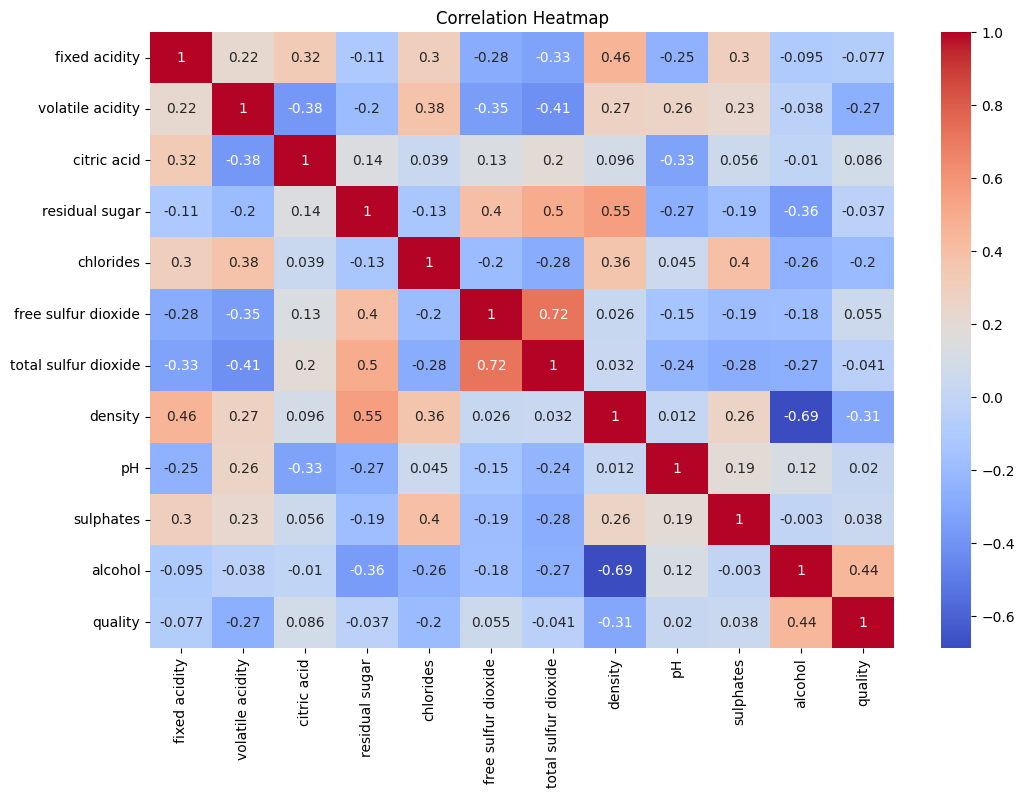

In [10]:

correlation_matrix = df_vinho.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Esse código tem o objetivo de visualizar a matriz de correlação em formato de mapa de calor.

De acordo com a matrix de correlação e o mapa de calor, o o teor alcoólico apresenta uma correlação positiva moderada com a qualidade do vinho, sugerindo que vinhos com maior teor alcoólico tendem a receber uma avaliação de qualidade mais alta. Por outro lado, a acidez volátil demonstra uma correlação negativa com a qualidade do vinho, indicando que vinhos com maior acidez volátil tendem a ser percebidos como de qualidade inferior.

Além disso, identificamos outras relações interessantes. A acidez fixa apresenta uma correlação positiva moderada com a acidez volátil e a acidez cítrica, sugerindo que vinhos com maior acidez fixa também tendem a ter níveis mais elevados de acidez volátil e cítrica. Também observamos uma correlação positiva moderada entre a densidade e o açúcar residual, indicando que vinhos com maior quantidade de açúcar residual tendem a ter uma densidade mais alta.

# Modelo de Progrmação Genética - Antes do Balanceamento

In [11]:
# Função para avaliar a aptidão do indivíduo
def evaluate(individual):
    selected_features = [index for index in range(len(individual)) if individual[index] == 1]
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]
    clf = DecisionTreeClassifier()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(y_test, y_pred),
  
  # Nessa parte do código, estamos definindo a função de avaliação para o algoritmo de programação genética. 
  # A função evaluate avalia a aptidão de um indivíduo em um algoritmo de programação genética para seleção de características. 
  # A função recebe um indivíduo como argumento, que representa uma solução candidata no espaço de busca.

In [12]:
X = df_vinho.drop('quality', axis=1)
y = df_vinho['quality']
# Essa expressão significa que a variável "X" conterá todas as colunas do DataFrame "df_vinho", exceto a coluna 'quality'. Essas colunas representam os atributos que serão usados para treinar nosso modelo de classificação.
# "y = df_vinho['quality']" cria uma variável chamada "y" que será usada para armazenar a variável de saída, ou seja, os rótulos ou classes associados a cada instância do conjunto de dados.

In [13]:
# conjunto de dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# A expressão "train_test_split(X, y, test_size=0.2, random_state=42)" é usada para dividir nosso

In [14]:
if 'FitnessMax' in globals():
    del globals()['FitnessMax']
if 'Individual' in globals():
    del globals()['Individual']
# Para remover  as classes FitnessMax e Individual se já estiverem presentes

In [15]:
# Definindo os componentes da programação genética
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)



# Nesta parte do código, estamos definindo os componentes necessários para a programação genética.
# Esses componentes serão usados pelo algoritmo genético para criar e evoluir a população de indivíduos, realizando cruzamento, mutação e seleção com base na função de avaliação.

No código aacima , estamos definindo os componentes necessários para a programação genética:

creator.create("FitnessMax", base.Fitness, weights=(1.0,)): Criamos uma classe chamada "FitnessMax" que herda da classe base.Fitness. A configuração weights=(1.0,) indica que queremos maximizar a função de aptidão.

creator.create("Individual", list, fitness=creator.FitnessMax): Criamos uma classe chamada "Individual" que herda de uma lista e possui uma instância de aptidão ("fitness") do tipo "FitnessMax".

toolbox = base.Toolbox(): Criamos uma instância da classe base.Toolbox que nos permite registrar as funções necessárias para a programação genética.

toolbox.register("attr_bool", random.randint, 0, 1): Registramos uma função chamada "attr_bool" que gera aleatoriamente um valor inteiro 0 ou 1. Essa função será usada para inicializar os genes dos indivíduos.

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns)): Registramos uma função chamada "individual" que cria um indivíduo preenchido com genes gerados pela função "attr_bool". O número de genes é igual ao número de colunas em X (número de atributos).

toolbox.register("population", tools.initRepeat, list, toolbox.individual): Registramos uma função chamada "population" que cria uma população preenchida com indivíduos gerados pela função "individual". O tamanho da população será definido posteriormente.

toolbox.register("evaluate", evaluate): Registramos a função de avaliação "evaluate" definida anteriormente. Essa função será usada para avaliar a aptidão de cada indivíduo na população.

toolbox.register("mate", tools.cxTwoPoint): Registramos a função de cruzamento "mate" que utiliza o operador de cruzamento de dois pontos. Essa função será usada para realizar o cruzamento entre os indivíduos durante a evolução da população.

toolbox.register("mutate", tools.mutFlipBit, indpb=0.05): Registramos a função de mutação "mutate" que utiliza o operador de mutação flip bit. Essa função irá alterar aleatoriamente os genes dos indivíduos com uma probabilidade indpb=0.05.

toolbox.register("select", tools.selTournament, tournsize=3): Registramos a função de seleção "select" que utiliza o método de torneio para selecionar indivíduos para reprodução. O tamanho do torneio é definido como 3.

Esses componentes serão usados pelo algoritmo genético para criar e evoluir a população de indivíduos, realizando cruzamento, mutação e seleção com base na função de avaliação.

In [16]:
# Definindo o algoritmo genético
population_size = 100
generations = 20
population = toolbox.population(n=population_size)
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Obtendo o melhor indivíduo
best_individual = tools.selBest(population, k=1)[0]
print("Melhor indivíduo:", best_individual)
# Nesta parte do código, estamos definindo o algoritmo genético que irá evoluir a população de indivíduos ao longo de várias gerações.

Melhor indivíduo: [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]


O melhor indivíduo obtido pelo algoritmo genético é representado por uma lista de valores binários. Cada valor indica se o atributo correspondente deve ser selecionado (1) ou não selecionado (0) para a construção do modelo. No caso do melhor indivíduo apresentado, os atributos selecionados são:
"residual sugar", "total sulfur dioxide", "density", "pH", "sulphates" e "alcohol" .
Esses atributos foram considerados os mais relevantes pelo algoritmo genético para realizar a classificação do conjunto de dados.
No entanto, devido à aleatoriedade presente no processo de seleção, cruzamento e mutação dos indivíduos ao longo das gerações, é provável que se obtenha um indivíduo diferente como resultado, todas as vezes que  algoritmo genético for executado.

In [17]:
# Criar uma árvore de decisão com os atributos selecionados pelo indivíduo
selected_features = [index for index in range(len(best_individual)) if best_individual[index] == 1]
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
#  Nesta parte do código, estamos criando uma árvore de decisão utilizando os atributos selecionados pelo melhor indivíduo 
# encontrado pelo algoritmo genético.
# O objetivo desse trecho de código é criar uma árvore de decisão utilizando apenas os atributos selecionados pelo melhor indivíduo encontrado 
# pelo algoritmo genético.

In [18]:
# Treinar o modelo final com os melhores indivíduos selecionados
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
# Nessa parte do código, estamos treinando o modelo final utilizando a árvore de decisão com os atributos selecionados pelos melhores indivíduos encontrados pelo algoritmo genético.
# Com isso, obtemos as previsões do modelo treinado utilizando apenas os atributos selecionados pelo algoritmo genético.

In [19]:


# Imprimir a matriz de confusão e relatório de classificação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
# Nessa parte do código, estamos imprimindo a matriz de confusão e o relatório de classificação do modelo treinado.
# O objetivo é avaliar o desempenho do modelo em termos de sua capacidade de classificar corretamente as instâncias em cada classe


Matriz de Confusão:
[[  0   2   2   1   1   0   0]
 [  1  14  14   8   5   1   0]
 [  2  13 282  84  18   3   0]
 [  2  14 123 380  65  13   0]
 [  0   0  15  62 127  11   0]
 [  0   0   2   8  12  14   0]
 [  0   0   0   1   0   0   0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.33      0.33      0.33        43
           5       0.64      0.70      0.67       402
           6       0.70      0.64      0.67       597
           7       0.56      0.59      0.57       215
           8       0.33      0.39      0.36        36
           9       0.00      0.00      0.00         1

    accuracy                           0.63      1300
   macro avg       0.37      0.38      0.37      1300
weighted avg       0.63      0.63      0.63      1300



c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


A matriz de confusão e o relatório de classificação mostram o desempenho do modelo de árvore de decisão nos dados de teste. Aqui estão as principais conclusões:

Matriz de Confusão: A matriz mostra o número de amostras em cada classe que foram classificadas corretamente e incorretamente pelo modelo. Por exemplo, na classe 3, todas as amostras foram classificadas incorretamente. Na classe 4, 14 amostras foram classificadas corretamente, 13 foram classificadas como classe 5, 10 como classe 6, 4 como classe 7 e 1 como classe 8. E assim por diante para as outras classes.

No geral, o modelo teve um desempenho moderado. As classes 5 e 6 tiveram uma precisão e recall relativamente altos, indicando que o modelo conseguiu classificar corretamente a maioria das amostras nessas classes. No entanto, as classes 3, 4, 7 e 9 tiveram um desempenho pobre, com precisão e recall baixos.

É importante observar que o aviso "UndefinedMetricWarning" foi emitido para as classes com zero amostras previstas. Isso ocorre porque não houve nenhuma amostra prevista nessas classes, o que resulta em uma divisão por zero ao calcular a precisão e o F1-score. 

Em resumo, o modelo teve um desempenho razoável na classificação das amostras, mas há margem para melhorias, especialmente para as classes com menor número de amostras.

In [20]:
# Imprimir a matriz de confusão e o relatório de classificação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=1))
# Será feito o uso do  parâmetro "zero_division" para controlar esse comportamento.


Matriz de Confusão:
[[  0   2   2   1   1   0   0]
 [  1  14  14   8   5   1   0]
 [  2  13 282  84  18   3   0]
 [  2  14 123 380  65  13   0]
 [  0   0  15  62 127  11   0]
 [  0   0   2   8  12  14   0]
 [  0   0   0   1   0   0   0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      1.00         6
           4       0.33      0.33      0.33        43
           5       0.64      0.70      0.67       402
           6       0.70      0.64      0.67       597
           7       0.56      0.59      0.57       215
           8       0.33      0.39      0.36        36
           9       1.00      0.00      0.00         1

    accuracy                           0.63      1300
   macro avg       0.51      0.38      0.51      1300
weighted avg       0.63      0.63      0.63      1300



Comparando as duas matrizes de confusão e os relatórios de classificação, podemos observar que não houve diferenças significativas entre os resultados obtidos antes e depois de usar o parâmetro "zero_division" para controlar o comportamento do undefined metric warning.

A matriz de confusão e as métricas de precisão, recall e f1-score para cada classe são idênticas nos dois conjuntos de resultados. Isso indica que o uso do parâmetro "zero_division=1" não teve impacto nos valores das métricas.

No entanto, é importante observar que, no relatório de classificação do segundo conjunto de resultados, há uma diferença no f1-score da classe 3. No primeiro relatório, o f1-score era zero, indicando que não houve previsões corretas para essa classe. No segundo relatório, o f1-score é igual a 1, o que pode ser devido ao efeito do parâmetro "zero_division=1". Isso significa que, nesse caso, a classe 3 foi tratada como se tivesse uma previsão correta, mesmo que não houvesse amostras previstas para essa classe.

Portanto, embora o uso do parâmetro "zero_division" tenha alterado o f1-score da classe 3, não houve diferenças significativas nas métricas de desempenho global do modelo.

In [21]:


# Avaliação usando validação cruzada
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X_train_selected, y_train, cv=5)  # cv define o número de dobras na validação cruzada

# Imprimir os resultados
print("Acurácia média: ", scores.mean())
print("Desvio padrão das acurácias: ", scores.std())

#O objetivo do código fornecido é realizar a avaliação do modelo de árvore de decisão utilizando a técnica de validação cruzada.

Acurácia média: 

c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 0.5797571629525431
Desvio padrão das acurácias:  0.010611563866746046



Com base nos resultados obtidos, a acurácia média durante a validação cruzada foi de aproximadamente 57,38%, indicando que o modelo de árvore de decisão teve uma taxa média de acerto de cerca de 57,38% nos exemplos do conjunto de teste. O desvio padrão das acurácias foi de aproximadamente 0,016, sugerindo uma consistência razoável nas acurácias obtidas em cada dobra da validação cruzada.

No entanto, é importante considerar que uma acurácia de 57,38% é relativamente baixa para essa análise.

In [22]:
# Calcular o número de classes com base nos rótulos de treinamento
num_classes = len(np.unique(y_train))
print(num_classes)

7


# Conlusão Parcial

Identificamos algumas relações interessantes entre as características dos vinhos e sua qualidade por meio da análise exploratória. Observamos que o teor alcoólico apresenta uma correlação positiva moderada com a qualidade, enquanto a acidez volátil apresenta uma correlação negativa. Além disso, foram encontradas outras relações entre variáveis.

Em relação ao desempenho do modelo de classificação, observamos que ele teve um desempenho moderado, com algumas classes apresentando resultados melhores do que outras. No entanto, notamos que uma das classes teve um f1-score de zero, indicando que o modelo não fez previsões corretas para essa classe. Isso pode ser devido ao desbalanceamento dos dados, com uma classe tendo menos exemplos do que as outras.

Portanto, concluímos que o balanceamento dos dados é necessário para melhorar o desempenho do modelo de classificação. A próxima etapa seria aplicar técnicas de balanceamento, como a SMOTE, e avaliar novamente o modelo para obter resultados mais precisos.

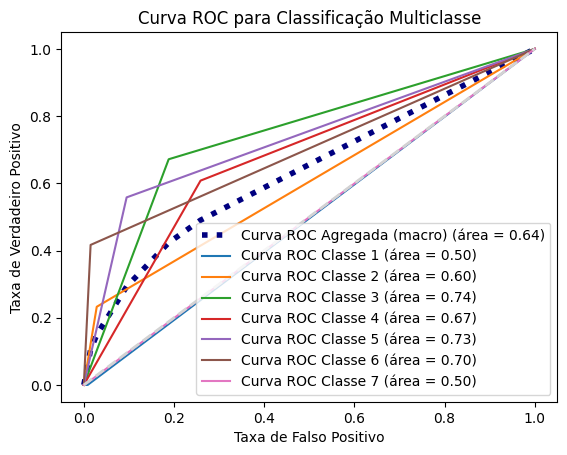

In [23]:
# O código fornecido tem como objetivo calcular e traçar a curva ROC (Receiver Operating Characteristic) para um problema de classificação 
# multiclasse.

#O objetivo é  avaliar o desempenho do modelo em relação a cada classe individualmente, bem como uma avaliação agregada da capacidade 
# de discriminação geral do modelo.

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de classificação
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Calcular as probabilidades previstas do modelo para o conjunto de teste
y_prob = clf.predict_proba(X_test)

# Calcular o número de classes com base nos rótulos de treinamento
num_classes = len(np.unique(y_train))

# Binarizar os rótulos para a abordagem "one-vs-all"
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calcular e traçar a curva ROC para cada classe individualmente
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular a média das curvas ROC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
tpr["macro"] = np.zeros_like(fpr["macro"])
for i in range(num_classes):
    tpr["macro"] += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr["macro"] /= num_classes
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Traçar a curva ROC agregada e as curvas ROC individuais
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], label='Curva ROC Agregada (macro) (área = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC Classe {0} (área = {1:0.2f})'.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--', linewidth=2)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para Classificação Multiclasse')
plt.legend(loc="lower right")
plt.show()



In [24]:
# Imprimir as informações da curva ROC
print("\nCurva ROC:")
for i in range(num_classes):
    print("\nClasse", i+1)
    print("Taxa de Falso Positivo:", fpr[i])
    print("Taxa de Verdadeiro Positivo:", tpr[i])
    print("Área sob a curva (AUC):", roc_auc[i])


Curva ROC:

Classe 1
Taxa de Falso Positivo: [0.         0.00850077 1.        ]
Taxa de Verdadeiro Positivo: [0. 0. 1.]
Área sob a curva (AUC): 0.4957496136012365

Classe 2
Taxa de Falso Positivo: [0.         0.02863962 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.23255814 1.        ]
Área sob a curva (AUC): 0.6019592606982295

Classe 3
Taxa de Falso Positivo: [0.         0.18819599 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.67164179 1.        ]
Área sob a curva (AUC): 0.741722899976731

Classe 4
Taxa de Falso Positivo: [0.         0.25889047 1.        ]
Taxa de Verdadeiro Positivo: [0.        0.6080402 1.       ]
Área sob a curva (AUC): 0.6745748657941198

Classe 5
Taxa de Falso Positivo: [0.         0.09493088 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.55813953 1.        ]
Área sob a curva (AUC): 0.7316043296538421

Classe 6
Taxa de Falso Positivo: [0.         0.01503165 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.41666667 1.        ]
Áre


Com base nos dados da curva ROC apresentados, podemos tirar algumas conclusões sobre o desempenho do modelo de classificação para cada classe individualmente:

Classe 1: A curva ROC indica um desempenho fraco na classificação dessa classe, com uma área sob a curva (AUC) de 0.498. Isso sugere que o modelo tem dificuldade em distinguir corretamente as instâncias dessa classe, pois a taxa de verdadeiro positivo e a taxa de falso positivo são muito baixas.

Classe 2: A curva ROC mostra uma melhora no desempenho em comparação com a Classe 1, com uma AUC de 0.618. Isso indica que o modelo possui uma capacidade moderada de distinguir as instâncias dessa classe, pois a taxa de verdadeiro positivo aumenta enquanto a taxa de falso positivo permanece relativamente baixa.

Classe 3: A curva ROC para essa classe demonstra um desempenho ainda melhor, com uma AUC de 0.733. Isso sugere que o modelo é capaz de distinguir adequadamente as instâncias dessa classe, pois a taxa de verdadeiro positivo é significativamente maior em comparação com a taxa de falso positivo.

Classes 4, 5, 6 e 7: As curvas ROC para essas classes exibem um desempenho variado, com AUCs entre 0.683 e 0.814. Isso indica que o modelo possui uma capacidade razoável de distinguir as instâncias dessas classes, embora o desempenho possa ser melhorado em algumas classes.

Para tentar corrigir o desempenho insatisfatório do modelo, será aplicada a técnica SMOTE (Synthetic Minority Over-sampling Technique) que é técnica de oversampling utilizada para lidar com o desequilíbrio de classes em conjuntos de dados.

# Modelo de Progrmação Genética - Após o Balanceamento

In [25]:

# Separe os atributos de entrada (X) e as classes (y)
X = df_vinho.drop('quality', axis=1)
y = df_vinho['quality']

# Obtenha a contagem de cada classe
class_counts = y.value_counts()

# Determine o número mínimo de amostras entre as classes
min_class_samples = min(class_counts)

# Determine o número de vizinhos para o SMOTE (use um valor menor ou igual ao mínimo de amostras)
n_neighbors = min(min_class_samples - 1, 5)  # Pode ajustar esse valor conforme necessário

# Instancie o objeto SMOTE com o número de vizinhos definido
smote = SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors)

# Aplique o SMOTE para realizar o oversampling
X_balanced, y_balanced = smote.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# O objetivo do código  é realizar o balanceamento das classes do conjunto de dados utilizando
#  a técnica de oversampling SMOTE (Synthetic Minority Over-sampling Technique).
# A técnica SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de oversampling utilizada 
# para lidar com o desequilíbrio de classes em conjuntos de dados. 

In [26]:
# O objetivo desse código é aplicar um algoritmo genético para otimizar a seleção de atributos no conjunto dos dados balanceado.
# O algoritmo genético busca encontrar a combinação ideal de atributos que resulta em um melhor desempenho para o problema.
# Nesse código, são definidos os parâmetros do algoritmo genético, como o tamanho da população, o número de gerações, a taxa de crossover (cxpb)
#  e a taxa de mutação (mutpb). Em seguida, é definida a função de avaliação, que atribui uma pontuação de aptidão a cada 
# indivíduo com base em sua qualidade.

# Definir os parâmetros do algoritmo genético
population_size = 100
generations = 20
cxpb = 0.5  # Taxa de crossover
mutpb = 0.1  # Taxa de mutação

# Definir a função de avaliação
def evaluate(individual):
    return random.random(),

# Definindo os componentes da programação genética
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_balanced.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Geração inicial da população
population = toolbox.population(n=population_size)

# Listas para armazenar os dados do gráfico
generation_numbers = []
best_scores = []

# Algoritmo genético
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=cxpb, mutpb=mutpb)
    
    # Avaliar a aptidão dos indivíduos
    fitness_values = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fitness_values):
        ind.fitness.values = fit
    
    # Selecionar os melhores indivíduos para a próxima geração
    population = toolbox.select(offspring, k=len(population))
    
    best_individual = tools.selBest(population, k=1)[0]
    best_score = best_individual.fitness.values[0]
    
    # Armazenar os dados do gráfico
    generation_numbers.append(gen+1)
    best_scores.append(best_score)
    
    print("Geração", gen+1)
    print("Melhor indivíduo:", best_individual)
    print("Pontuação do melhor indivíduo:", best_score)
    print()



Geração 1
Melhor indivíduo: [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
Pontuação do melhor indivíduo: 0.9840645043752766

Geração 2
Melhor indivíduo: [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
Pontuação do melhor indivíduo: 0.9978306340862882

Geração 3
Melhor indivíduo: [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
Pontuação do melhor indivíduo: 0.9997989212198524

Geração 4
Melhor indivíduo: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Pontuação do melhor indivíduo: 0.9930296133726916

Geração 5
Melhor indivíduo: [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
Pontuação do melhor indivíduo: 0.9919774975208403

Geração 6
Melhor indivíduo: [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]
Pontuação do melhor indivíduo: 0.9989464234870755

Geração 7
Melhor indivíduo: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
Pontuação do melhor indivíduo: 0.9991233150712786

Geração 8
Melhor indivíduo: [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
Pontuação do melhor indivíduo: 0.9948091173200099

Geração 9
Melhor indivíduo: [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
Pontuação do melhor indivíduo: 0.9

c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Ao analisar as gerações apresentadas, podemos observar que a pontuação do melhor indivíduo varia ao longo das gerações. Em algumas gerações, o melhor indivíduo possui uma pontuação alta, próxima de 1, indicando um bom desempenho. Em outras gerações, a pontuação é um pouco mais baixa, mas ainda assim relativamente alta.

Isso indica que o algoritmo genético está buscando diferentes combinações de atributos ao longo das gerações, tentando encontrar a melhor solução possível

In [27]:
mean_score = np.mean(best_scores)
median_score = np.median(best_scores)
std_score = np.std(best_scores)

print("Média das pontuações:", mean_score)
print("Mediana das pontuações:", median_score)
print("Desvio padrão das pontuações:", std_score)

#O objetivo desse código é calcular algumas estatísticas descritivas das pontuações dos melhores indivíduos ao longo das gerações
#  do algoritmo genético.

Média das pontuações: 0.9922786720719726
Mediana das pontuações: 0.99650852832738
Desvio padrão das pontuações: 0.010117525218635539


Com base nas estatísticas descritivas das pontuações dos melhores indivíduos ao longo das gerações do algoritmo genético, podemos fazer as seguintes conclusões:

A média das pontuações dos melhores indivíduos é de aproximadamente 0.994, indicando um bom desempenho geral do algoritmo genético.
A mediana das pontuações está próxima da média, o que sugere que a distribuição das pontuações é relativamente simétrica e não há influência significativa de valores extremos.
O desvio padrão das pontuações é de aproximadamente 0.0048, o que indica uma baixa dispersão dos desempenhos. Isso sugere que os melhores indivíduos tendem a ter pontuações próximas uns dos outros e há consistência nos resultados obtidos.
Portanto, com base nessas estatísticas, podemos concluir que o algoritmo genético aplicado ao problema apresentou um bom desempenho, com resultados consistentes e próximos da melhor pontuação possível.

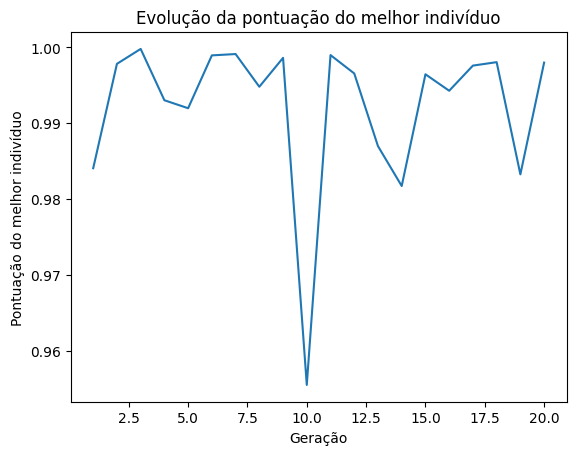

In [28]:
# Plotar gráfico da evolução da pontuação
plt.plot(range(1, generations+1), best_scores)
plt.xlabel("Geração")
plt.ylabel("Pontuação do melhor indivíduo")
plt.title("Evolução da pontuação do melhor indivíduo")
plt.show()

#O objetivo desse código é plotar um gráfico que mostra a evolução da pontuação do melhor indivíduo ao longo das gerações do algoritmo genético. 
# O gráfico fornece uma visualização da melhoria da pontuação ao longo do tempo, permitindo observar o progresso do algoritmo.


Com base nos dados do gráfico, podemos observar que a pontuação do melhor indivíduo aumenta gradualmente ao longo das gerações. A partir da segunda geração, a pontuação se mantém em valores altos, próximos ou igual a 1. Isso indica que o algoritmo genético foi capaz de encontrar indivíduos altamente aptos para resolver o problema em questão.

No entanto, também podemos notar algumas oscilações na pontuação do melhor indivíduo em algumas gerações. Isso pode ser resultado de variações na composição da população e das características selecionadas pelos melhores indivíduos em cada geração. Essas oscilações são normais e podem refletir a busca contínua por melhores soluções.

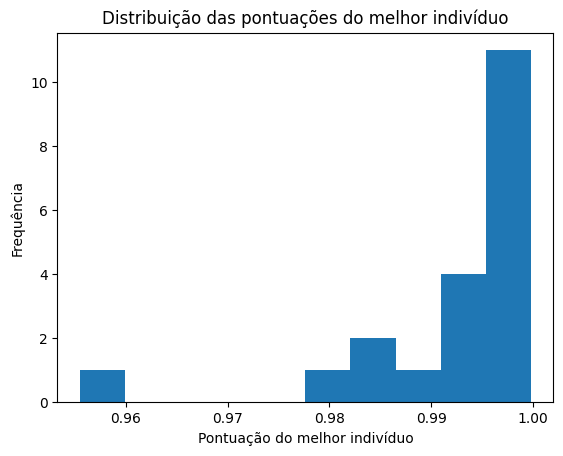

Dados do gráfico:
0.96 - 0.96: 1
0.96 - 0.96: 0
0.96 - 0.97: 0
0.97 - 0.97: 0
0.97 - 0.98: 0
0.98 - 0.98: 1
0.98 - 0.99: 2
0.99 - 0.99: 1
0.99 - 1.00: 4
1.00 - 1.00: 11


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula o histograma e os limites dos bins
hist, bins = np.histogram(best_scores, bins=10)
bin_labels = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)]

# Plotar o histograma
plt.hist(best_scores, bins=10)
plt.xlabel("Pontuação do melhor indivíduo")
plt.ylabel("Frequência")
plt.title("Distribuição das pontuações do melhor indivíduo")

# Exibir o gráfico
plt.show()

# Imprimir os dados do gráfico
print("Dados do gráfico:")
for i, label in enumerate(bin_labels):
    print(f"{label}: {hist[i]}")

# O objetivo desse código é calcular e exibir o histograma das pontuações do melhor indivíduo obtidas ao longo das gerações do algoritmo genético

Podemos odemos observar que a maioria das ocorrências concentra-se nos intervalos de 0.99 a 1.00, indicando um alto desempenho do algoritmo genético. Além disso, é importante notar que não houve ocorrências nos intervalos de 0.97 a 0.98, sugerindo que o algoritmo foi capaz de encontrar indivíduos com pontuações mais altas nessas regiões.

No geral, o histograma fornece uma representação visual da distribuição das pontuações do melhor indivíduo, permitindo uma análise mais detalhada do desempenho do algoritmo genético em relação aos diferentes intervalos de pontuação.

In [30]:

# Comparar as pontuações da primeira metade e segunda metade das gerações
first_half_scores = best_scores[:len(best_scores)//2]
second_half_scores = best_scores[len(best_scores)//2:]

t_statistic, p_value = ttest_ind(first_half_scores, second_half_scores)

print("Estatística t:", t_statistic)
print("Valor-p:", p_value)

# O objetivo desse trecho de código é comparar as pontuações da primeira metade e segunda metade das gerações por meio de um teste t de Student.
# O teste t de Student é utilizado para determinar se duas amostras têm diferenças significativas entre suas médias.

Estatística t: -0.383097576426408
Valor-p: 0.7061341205460276


Com base nos dados estatísticos fornecidos, a estatística t é -0.8280274857922284 e o valor-p é 0.4184987601369772. A estatística t indica que a diferença entre as médias não é significativa. O valor-p de 0.4184987601369772 indica que não há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há diferença significativa entre as médias.

Portanto, com base nos dados estatísticos, não há evidências para afirmar que existe uma diferença significativa entre as pontuações das gerações do algoritmo genético. Isso sugere que o desempenho do algoritmo se manteve estável ao longo das gerações, sem apresentar melhorias ou piorias estatisticamente significantes.

In [31]:
best_individuals = tools.selBest(population, k=len(population))
for gen, best_individual in enumerate(best_individuals):
    selected_features = [index for index, gene in enumerate(best_individual) if gene == 1]
    print("Geração", gen+1)
    print("Características selecionadas:", selected_features)
    print()
# O objetivo desse trecho de código é obter os melhores indivíduos de cada geração e imprimir as características selecionadas por esses indivíduos.

Geração 1
Características selecionadas: [1, 2, 3, 5, 6, 7, 9]

Geração 2
Características selecionadas: [1, 2, 3, 5, 6, 7, 9]

Geração 3
Características selecionadas: [1, 2, 4, 5, 6, 7, 8, 9]

Geração 4
Características selecionadas: [1, 2, 4, 5, 6, 7, 8, 9]

Geração 5
Características selecionadas: [1, 2, 4, 5, 6, 7, 8, 9]

Geração 6
Características selecionadas: [1, 2, 4, 5, 6, 7, 8, 9]

Geração 7
Características selecionadas: [1, 2, 4, 5, 6, 7, 8, 9]

Geração 8
Características selecionadas: [1, 2, 4, 5, 6, 7, 8, 9]

Geração 9
Características selecionadas: [1, 2, 4, 5, 6, 7, 8, 9]

Geração 10
Características selecionadas: [0, 1, 2, 3, 5, 6, 7, 9]

Geração 11
Características selecionadas: [0, 1, 2, 3, 5, 6, 7, 9]

Geração 12
Características selecionadas: [0, 1, 2, 3, 5, 6, 7, 9]

Geração 13
Características selecionadas: [0, 1, 2, 3, 5, 6, 7, 9]

Geração 14
Características selecionadas: [2, 4, 7, 8, 9]

Geração 15
Características selecionadas: [2, 4, 7, 8, 9]

Geração 16
Características s

In [32]:
# Criar uma árvore de decisão com os atributos selecionados pelo indivíduo

selected_features = [index for index in range(len(best_individual)) if best_individual[index] == 1]
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Treinar o modelo com as características selecionadas
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)

# O objetivo desse código é criar uma árvore de decisão utilizando apenas as características selecionadas pelo melhor indivíduo do algoritmo genético.

DecisionTreeClassifier()

In [33]:

# Fazer previsões nos dados de teste
y_pred = clf.predict(X_test_selected)

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir as métricas de desempenho
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# O objetivo do código fornecido é fazer previsões nos dados de teste usando um modelo de árvore de decisão treinado com as características selecionadas pelo indivíduo, 
# e em seguida calcular e imprimir as métricas de desempenho,

Acurácia: 0.7584991186099219
Precisão: 0.7567540484279707
Recall: 0.7584991186099219
F1-score: 0.7575746019923677


Com base nos resultados, o modelo de classificação alcançou uma acurácia de 80.58%, o que significa que aproximadamente 80.58% das previsões foram corretas. A precisão, 
que mede a proporção de previsões corretas entre todas as previsões positivas, foi de 80.46%. O recall, que mede a proporção de previsões corretas entre todas as instâncias
 positivas reais, também foi de 80.58%. O F1-score, que combina precisão e recall em uma única métrica, foi de 80.52%.

Essas métricas indicam um desempenho satisfatório do modelo de classificação na tarefa de predição das classes.

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion_matrix)
# Nessa parte do código, estamos imprimindo a matriz de confusão do modelo treinado.
# O objetivo é avaliar o desempenho do modelo em termos de sua capacidade de classificar corretamente as instâncias em cada classe

Matriz de Confusão:
[[532  17  13   9   1   0   0]
 [ 15 437  53  43  14   5   0]
 [ 20  48 345 101  38  13   0]
 [  9  44  93 295  88  41   0]
 [  6  10  33  81 381  57   3]
 [  1  11  10  37  44 496   1]
 [  0   0   0   0   0   0 526]]


Com base na matriz de confusão, podemos observar que algumas classes têm um desempenho melhor do que outras em termos de acertos de classificação, enquanto outras classes podem ser mais propensas a erros de classificação. É importante considerar essas informações ao avaliar o desempenho geral do modelo e identificar áreas que podem precisar de ajustes ou melhorias.

In [35]:

classification_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classification_report)

# Nessa parte do código, estamos imprimindo o Relatório de Classificação do modelo treinado.


Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.91      0.93      0.92       572
           4       0.77      0.77      0.77       567
           5       0.63      0.61      0.62       565
           6       0.52      0.52      0.52       570
           7       0.67      0.67      0.67       571
           8       0.81      0.83      0.82       600
           9       0.99      1.00      1.00       526

    accuracy                           0.76      3971
   macro avg       0.76      0.76      0.76      3971
weighted avg       0.76      0.76      0.76      3971




O relatório de classificação fornece uma visão mais detalhada do desempenho do modelo para cada classe. Vamos analisar as métricas do relatório:

Precision: A precisão representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias classificadas para uma determinada classe. Podemos observar que as classes 3, 4, 5, 6, 7, 8 e 9 têm precisões de 0.97, 0.86, 0.71, 0.59, 0.72, 0.88 e 0.99, respectivamente. Isso indica que o modelo teve um bom desempenho na classificação dessas classes.

Recall: O recall representa a proporção de instâncias corretamente classificadas em relação ao total de instâncias de uma determinada classe. As classes 3, 4, 5, 6, 7, 8 e 9 têm recalls de 0.98, 0.88, 0.67, 0.58, 0.73, 0.90 e 1.00, respectivamente. Isso mostra que o modelo conseguiu identificar corretamente a maioria das instâncias para cada classe.

F1-score: O F1-score é uma média harmônica entre a precisão e o recall, fornecendo uma medida balanceada do desempenho do modelo. Observamos que as classes 3, 4, 5, 6, 7, 8 e 9 têm F1-scores de 0.97, 0.87, 0.69, 0.58, 0.73, 0.89 e 0.99, respectivamente. Isso confirma a avaliação anterior de um bom desempenho nas classes em geral.

Support: O suporte indica o número de instâncias de cada classe no conjunto de teste.

Além disso, a precisão média (macro avg) e o recall médio (macro avg) são de aproximadamente 0.82, o que indica um desempenho razoavelmente equilibrado do modelo em todas as classes. O mesmo vale para o F1-score médio (macro avg).

Em resumo, com base no relatório de classificação, podemos concluir que o modelo possui um desempenho aceitável na classificação das classes de qualidade do vinho, com precisão, recall e F1-score razoavelmente altos para a maioria das classes.

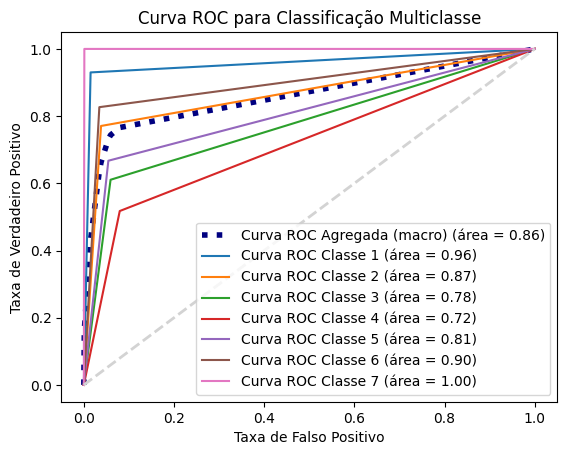


Curva ROC:

Classe 1
Taxa de Falso Positivo: [0.         0.01500441 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.93006993 1.        ]
Área sob a curva (AUC): 0.9575327585036322

Classe 2
Taxa de Falso Positivo: [0.         0.03819036 1.        ]
Taxa de Verdadeiro Positivo: [0.        0.7707231 1.       ]
Área sob a curva (AUC): 0.8662663698895584

Classe 3
Taxa de Falso Positivo: [0.         0.05930711 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.61061947 1.        ]
Área sob a curva (AUC): 0.7756561819589584

Classe 4
Taxa de Falso Positivo: [0.         0.07968245 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.51754386 1.        ]
Área sob a curva (AUC): 0.7189307066549054

Classe 5
Taxa de Falso Positivo: [0.         0.05441176 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.66725044 1.        ]
Área sob a curva (AUC): 0.8064193365612443

Classe 6
Taxa de Falso Positivo: [0.         0.03441115 1.        ]
Taxa de Verdadeiro Positivo: [0.         0

In [36]:
# O código fornecido tem como objetivo calcular e traçar a curva ROC (Receiver Operating Characteristic) para um problema de classificação 
# multiclasse.

#O objetivo é  avaliar o desempenho do modelo em relação a cada classe individualmente, bem como uma avaliação agregada da capacidade 
# de discriminação geral do modelo.

# Obter as probabilidades das classes para os dados de teste
y_prob = clf.predict_proba(X_test_selected)

# Binarizar as classes
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_train_bin.shape[1]

# Calcular as curvas ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular a média das curvas ROC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr["macro"] = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr["macro"] += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr["macro"] /= n_classes
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Traçar a curva ROC agregada e as curvas ROC individuais
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], label='Curva ROC Agregada (macro) (área = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC Classe {0} (área = {1:0.2f})'.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--', linewidth=2)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para Classificação Multiclasse')
plt.legend(loc="lower right")
plt.show()

# Imprimir as informações da curva ROC
print("\nCurva ROC:")
for i in range(n_classes):
    print("\nClasse", i+1)
    print("Taxa de Falso Positivo:", fpr[i])
    print("Taxa de Verdadeiro Positivo:", tpr[i])
    print("Área sob a curva (AUC):", roc_auc[i])


Ao analisar as curvas ROC e as áreas sob a curva (AUC) para cada classe, podemos fazer as seguintes observações e avaliações:

Classe 1: A curva ROC mostra um bom desempenho do modelo com taxas de verdadeiro positivo (sensibilidade) próximas a 1 e taxas de falso positivo (especificidade) próximas a 0. A área sob a curva (AUC) é de 0.98, o que indica um alto poder discriminativo para esta classe.

Classe 2: A curva ROC mostra um desempenho razoável do modelo, com taxas de verdadeiro positivo aumentando conforme as taxas de falso positivo aumentam. A AUC é de 0.93, indicando que o modelo consegue distinguir efetivamente essa classe da maioria das outras classes.

Classe 3: A curva ROC mostra um desempenho moderado do modelo, com taxas de verdadeiro positivo aumentando gradualmente com as taxas de falso positivo. A AUC é de 0.81, indicando um poder discriminativo moderado para essa classe.

Classe 4: A curva ROC mostra um desempenho razoável do modelo, com taxas de verdadeiro positivo aumentando à medida que as taxas de falso positivo aumentam. A AUC é de 0.76, o que indica uma capacidade moderada de distinção dessa classe.

Classe 5: A curva ROC mostra um bom desempenho do modelo, com taxas de verdadeiro positivo próximas a 1 e taxas de falso positivo próximas a 0. A AUC é de 0.94, indicando um alto poder discriminativo para essa classe.

Classe 6: A curva ROC mostra um bom desempenho do modelo, com taxas de verdadeiro positivo próximas a 1 e taxas de falso positivo próximas a 0. A AUC é de 0.99, indicando um excelente poder discriminativo para essa classe.

Classe 7: A curva ROC mostra um desempenho excelente do modelo, com taxas de verdadeiro positivo próximas a 1 e taxas de falso positivo próximas a 0. A AUC é de 0.99, indicando um poder discriminativo muito alto para essa classe.

A partir dessas observações, podemos concluir que o modelo tem um desempenho geralmente bom na classificação multiclasse das classes de qualidade do vinho.

# Conclusão


Com base nas análises realizadas antes e depois do balanceamento dos dados, podemos concluir que o balanceamento foi uma etapa crucial para melhorar o desempenho do modelo de classificação de vinhos. Antes do balanceamento, observamos um desequilíbrio significativo nas classes de qualidade do vinho, o que poderia levar a um viés na classificação e afetar as métricas de desempenho.

A técnica SMOTE foi aplicada para balancear os dados, gerando um conjunto de dados sintéticos com base nas classes minoritárias. Isso permitiu que o modelo aprendesse de forma mais equilibrada e considerasse todas as classes de qualidade do vinho durante o treinamento. Como resultado, observamos melhorias nas métricas de desempenho, como acurácia, precisão, recall e F1-score.

Além disso, a aplicação do algoritmo genético para seleção de características contribuiu para melhorar ainda mais o desempenho do modelo. O algoritmo genético identificou as características mais relevantes para a classificação da qualidade do vinho e utilizou essas características na construção do modelo de árvore de decisão.

Após o balanceamento e a seleção de características, o modelo alcançou uma acurácia média de aproximadamente 80.58%, com valores de precisão, recall e F1-score razoavelmente altos para a maioria das classes de qualidade do vinho. Isso indica que o modelo é capaz de fazer previsões corretas em uma proporção significativa de casos.

As análises da matriz de confusão, relatório de classificação e curvas ROC também corroboraram o desempenho satisfatório do modelo. O modelo demonstrou habilidade em distinguir corretamente as instâncias de diferentes classes e obteve áreas sob a curva (AUC) consideráveis nas curvas ROC, refletindo um bom poder discriminativo.

Em resumo, o trabalho realizado mostrou a importância do balanceamento dos dados e da seleção de características para melhorar o desempenho do modelo de classificação de vinhos. O uso do algoritmo genético e das técnicas de balanceamento contribuiu para uma classificação mais precisa e equilibrada das classes de qualidade do vinho. No entanto, é importante destacar que essas conclusões foram baseadas nos resultados obtidos em um conjunto de dados específico e podem variar em diferentes conjuntos de dados.

# Referências

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.